## HEART DISEASE PREDICTION
### 215229113 

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Load Dataset

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data1=pd.read_csv("Heart1.csv")

### Examine dataset
 

Read the dataset
dtypes
isnull
describe
get numeric

In [4]:
data.shape

(303, 14)

In [5]:
data1.shape

(303, 15)

In [6]:
data1.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [7]:
data1.drop("Unnamed: 0",axis=1,inplace=True)

In [8]:
data1['ChestPain'].value_counts()

asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: ChestPain, dtype: int64

In [9]:
data1['ChestPain'].replace("asymptomatic",0,inplace=True)

In [10]:
data1['ChestPain'].replace("nonanginal",1,inplace=True)

In [11]:
data1['ChestPain'].replace("nontypical",2,inplace=True) 

In [12]:
data1['ChestPain'].replace("typical",3,inplace=True)

In [13]:
data1['ChestPain'].value_counts()

0    144
1     86
2     50
3     23
Name: ChestPain, dtype: int64

In [14]:
data1.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [15]:
data1['Thal'].value_counts()

normal        166
reversable    117
fixed          18
Name: Thal, dtype: int64

In [16]:
data1['Thal'].replace("normal",0,inplace=True)

In [17]:
data1['Thal'].replace("reversable",1,inplace=True)

In [18]:
data1['Thal'].replace("fixed",2,inplace=True)

In [19]:
data1['Thal'].value_counts()

0.0    166
1.0    117
2.0     18
Name: Thal, dtype: int64

In [20]:
data1['AHD'].replace("No",0,inplace=True)

In [21]:
data1['AHD'].replace("Yes",1,inplace=True)

In [22]:
data1.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,2.0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,0.0,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,1.0,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,0.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,0.0,0


In [23]:
data1.dtypes

Age            int64
Sex            int64
ChestPain      int64
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal         float64
AHD            int64
dtype: object

In [24]:
data1.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [25]:
data1.dropna(inplace=True)

In [26]:
data1.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [27]:
data1.describe()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,0.841751,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,0.508418,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.610242,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,1.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,2.000000,1.000000


### Data Exploration

In [28]:
data1.AHD.value_counts()

0    160
1    137
Name: AHD, dtype: int64

In [29]:
import seaborn as sns 
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

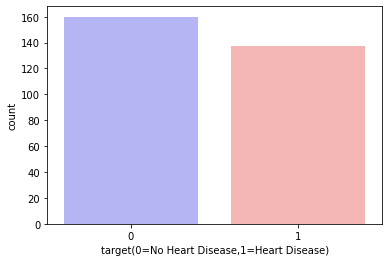

In [30]:
sns.countplot(x='AHD',data=data1,palette='bwr')
plt.xlabel("target(0=No Heart Disease,1=Heart Disease)")
plt.show

In [31]:
countnoHD=len(data1[data1.AHD==0])
counthaveHD=len(data1[data1.AHD==1])
print('Percentage of Patients not having Heart Disease:{:.2f}%'.format((countnoHD/(len(data.target))*100)))
print('Percentage of Patients having Heart Disease:{:.2f}%'.format((counthaveHD/(len(data.target))*100)))

Percentage of Patients not having Heart Disease:52.81%
Percentage of Patients having Heart Disease:45.21%


<function matplotlib.pyplot.show(close=None, block=None)>

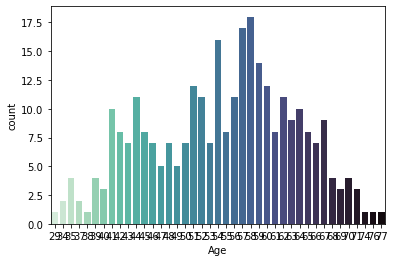

In [32]:
sns.countplot(x='Age',data=data1,palette='mako_r')
plt.show

In [33]:
old=len(data1[data1.Age>=30])
teen=len(data1[data1.Age<=29])
print('Percentage of old Patients having Heart Disease:{:.2f}%'.format((old/(len(data.age))*100)))
print('Percentage of teen Patients having Heart Disease:{:.2f}%'.format((teen/(len(data.age))*100)))

Percentage of old Patients having Heart Disease:97.69%
Percentage of teen Patients having Heart Disease:0.33%


In [34]:
data1.groupby('AHD').mean()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
AHD,,,,,,,,,,,,,
0,52.643750,0.556250,1.206250,129.175000,243.493750,0.143750,0.843750,158.581250,0.143750,0.598750,1.412500,0.275000,0.243750
1,56.759124,0.817518,0.416058,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,1.824818,1.145985,0.817518


### Train  andTest

In [35]:
X=data1.drop('AHD',axis=1)
X.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,2.0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,0.0
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,1.0
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,0.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,0.0


In [36]:
y=data1.pop('AHD')

### Importing sklearn

In [37]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler 
ss=StandardScaler() 
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

### Create instance class & Fit data

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_model=lr.fit(X_train_ss,y_train)
lr_model

LogisticRegression()

### Predict Data

In [40]:
lr_y_pred=lr_model.predict(X_test_ss)
lr_y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

### Accuracy Score:

In [41]:
from sklearn.metrics import accuracy_score
log_acc=accuracy_score(y_test,lr_y_pred)
log_acc

0.8533333333333334

### LinearSVC

In [42]:
from sklearn.svm import LinearSVC
LinSVC=LinearSVC()
model_SVC=LinSVC.fit(X_train_ss,y_train)
LinSVC_y_pred=model_SVC.predict(X_test_ss)
LinSVC_acc=accuracy_score(y_test,LinSVC_y_pred)
LinSVC_acc

0.8933333333333333

### KNeighborsClassifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn_model=knn.fit(X_train_ss,y_train)
knn_y_pred=knn_model.predict(X_test_ss)
knn_acc=accuracy_score(y_test,knn_y_pred)
knn_acc

0.88

### Confusion Matrics

In [44]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,lr_y_pred)
cm

array([[35,  5],
       [ 6, 29]], dtype=int64)

Text(0.5, 1.0, 'accuracy Score:0.8533333333333334')

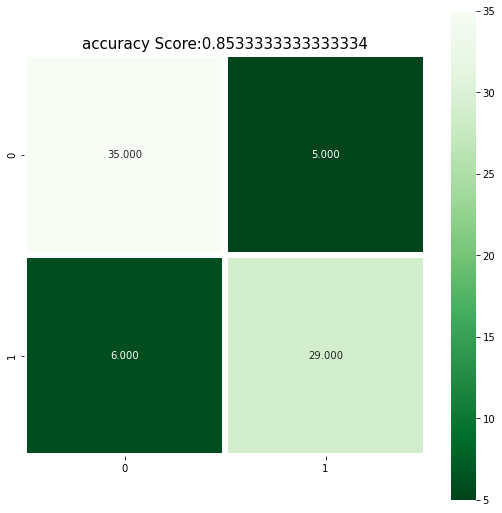

In [45]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='.3f',linewidths=5,square=True,cmap='Greens_r')
allsampletitle="accuracy Score:{0}".format(log_acc)
plt.title(allsampletitle,size=15)

### Recall Score

In [46]:
from sklearn import metrics
metrics.recall_score(y_test,lr_y_pred)

0.8285714285714286

### Precision Score

In [47]:
metrics.precision_score(y_test,lr_y_pred)

0.8529411764705882

### Classification_report

In [48]:
metrics.classification_report(y_test,lr_y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.88      0.86        40\n           1       0.85      0.83      0.84        35\n\n    accuracy                           0.85        75\n   macro avg       0.85      0.85      0.85        75\nweighted avg       0.85      0.85      0.85        75\n'

### Random forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=2, n_estimators=120,
    min_samples_split=3, max_leaf_nodes=5,
    random_state=22)
rf_model=rf.fit(X_train_ss,y_train)
rf_y_pred=rf_model.predict(X_test_ss)
rf_acc=accuracy_score(y_test,rf_y_pred)
rf_acc

0.84

Text(0.5, 1.0, 'accuracy Score:0.8533333333333334')

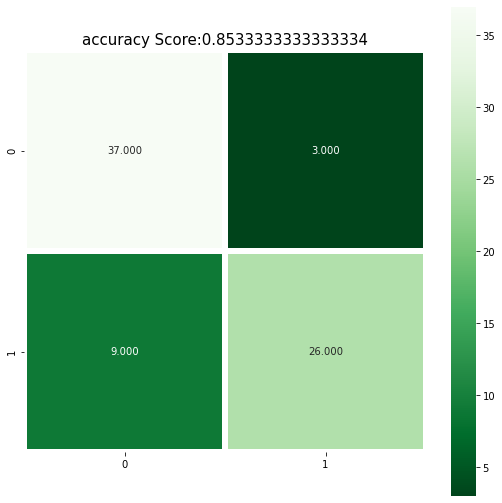

In [50]:
### confusion matrix

rf_cm=confusion_matrix(y_test,rf_y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(rf_cm,annot=True,fmt='.3f',linewidths=5,square=True,cmap='Greens_r')
allsampletitle="accuracy Score:{0}".format(log_acc)
plt.title(allsampletitle,size=15)

In [51]:
### analysing models
print("logistic Regression:",log_acc)
print("SVM :",LinSVC_acc)
print("KNN:",knn_acc)
print("Random Forest:",rf_acc)

logistic Regression: 0.8533333333333334
SVM : 0.8933333333333333
KNN: 0.88
Random Forest: 0.84


### Find overfitting

### Decison Tree

In [52]:
values = [i for i in range(1, 21)]

In [53]:
train_scores=[]
test_scores=[]
from sklearn.tree import DecisionTreeClassifier
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = DecisionTreeClassifier(max_depth=i)
 # fit model on the training dataset
 model.fit(X_train_ss, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train_ss)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test_ss)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.757, test: 0.747
>2, train: 0.797, test: 0.720
>3, train: 0.847, test: 0.773
>4, train: 0.878, test: 0.733
>5, train: 0.928, test: 0.747
>6, train: 0.964, test: 0.733
>7, train: 0.991, test: 0.733
>8, train: 1.000, test: 0.760
>9, train: 1.000, test: 0.773
>10, train: 1.000, test: 0.747
>11, train: 1.000, test: 0.720
>12, train: 1.000, test: 0.787
>13, train: 1.000, test: 0.733
>14, train: 1.000, test: 0.773
>15, train: 1.000, test: 0.693
>16, train: 1.000, test: 0.787
>17, train: 1.000, test: 0.720
>18, train: 1.000, test: 0.773
>19, train: 1.000, test: 0.733
>20, train: 1.000, test: 0.720


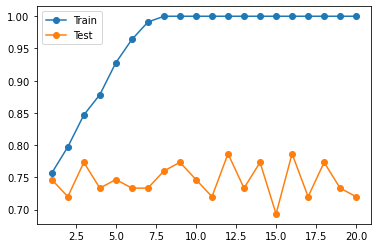

In [54]:
from matplotlib import pyplot
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

### KNN

>1, train: 1.000, test: 0.787
>2, train: 0.878, test: 0.853
>3, train: 0.887, test: 0.907
>4, train: 0.851, test: 0.893
>5, train: 0.883, test: 0.893
>6, train: 0.856, test: 0.880
>7, train: 0.838, test: 0.880
>8, train: 0.815, test: 0.893
>9, train: 0.833, test: 0.893
>10, train: 0.829, test: 0.880
>11, train: 0.838, test: 0.907
>12, train: 0.833, test: 0.907
>13, train: 0.838, test: 0.933
>14, train: 0.820, test: 0.907
>15, train: 0.811, test: 0.880
>16, train: 0.811, test: 0.853
>17, train: 0.824, test: 0.867
>18, train: 0.820, test: 0.867
>19, train: 0.815, test: 0.853
>20, train: 0.815, test: 0.853
>21, train: 0.815, test: 0.853
>22, train: 0.806, test: 0.867
>23, train: 0.811, test: 0.853
>24, train: 0.815, test: 0.867
>25, train: 0.811, test: 0.867
>26, train: 0.811, test: 0.867
>27, train: 0.824, test: 0.853
>28, train: 0.820, test: 0.867
>29, train: 0.829, test: 0.867
>30, train: 0.820, test: 0.867
>31, train: 0.820, test: 0.867
>32, train: 0.820, test: 0.853
>33, train: 0.824

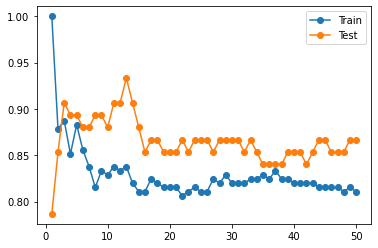

In [55]:
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = KNeighborsClassifier(n_neighbors=i)
 # fit model on the training dataset
 model.fit(X_train_ss, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train_ss)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test_ss)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn_model=knn.fit(X_train_ss,y_train)
knn_y_pred=knn_model.predict(X_test_ss)
knn_acc=accuracy_score(y_test,knn_y_pred)
knn_acc

0.8933333333333333

### Random Forest

In [57]:
model = RandomForestClassifier()
model.fit(X_train_ss, y_train)
print('Training Accuracy : ',
      accuracy_score(y_train,
                             model.predict(X_train))*100)
print('Validation Accuracy : ',
      accuracy_score(y_test,model.predict(X_test_ss))*100)

Training Accuracy :  45.94594594594595
Validation Accuracy :  82.66666666666667


C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [58]:
model = RandomForestClassifier(max_depth=2,
                               random_state=22)
model.fit(X_train_ss, y_train)
print('Training Accuracy : ',
      accuracy_score(y_train,
                             model.predict(X_train))*100)
print('Validation Accuracy : ',
      accuracy_score(y_test,model.predict(X_test_ss))*100)

Training Accuracy :  45.94594594594595
Validation Accuracy :  84.0


C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [59]:
model = RandomForestClassifier(
    max_depth=2, n_estimators=30,
    min_samples_split=3, max_leaf_nodes=5,
    random_state=22)
model.fit(X_train_ss, y_train)
print('Training Accuracy : ',
      accuracy_score(y_train,
                             model.predict(X_train))*100)
print('Validation Accuracy : ',
      accuracy_score(y_test,model.predict(X_test_ss))*100)


Training Accuracy :  45.94594594594595
Validation Accuracy :  85.33333333333334


C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


>10, train: 0.459, test: 0.813
>20, train: 0.459, test: 0.840


C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


>30, train: 0.459, test: 0.853
>40, train: 0.459, test: 0.867


C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


>50, train: 0.459, test: 0.840
>60, train: 0.459, test: 0.840


C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


>70, train: 0.459, test: 0.840
>80, train: 0.459, test: 0.840


C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


>90, train: 0.459, test: 0.840
>100, train: 0.459, test: 0.840


C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


>110, train: 0.459, test: 0.840
>120, train: 0.459, test: 0.840


C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


>130, train: 0.459, test: 0.840
>140, train: 0.459, test: 0.840


C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


>150, train: 0.459, test: 0.840
>160, train: 0.459, test: 0.840


C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


>170, train: 0.459, test: 0.840


C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


>180, train: 0.459, test: 0.840


C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


>190, train: 0.459, test: 0.840


C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


>200, train: 0.459, test: 0.840


C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


>210, train: 0.459, test: 0.840
>220, train: 0.459, test: 0.840


C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


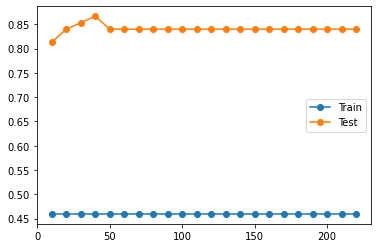

In [60]:
n_estimators=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220]
train_scores=[]
test_scores=[]

for i in n_estimators:
    model = RandomForestClassifier(
        max_depth=2, n_estimators=i,
        min_samples_split=3, max_leaf_nodes=5,
        random_state=22)
    model.fit(X_train_ss, y_train)

    train_acc=accuracy_score(y_train,model.predict(X_train))
    train_scores.append(train_acc)
    test_acc=accuracy_score(y_test,model.predict(X_test_ss))
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
pyplot.plot(n_estimators, train_scores, '-o', label='Train')
pyplot.plot(n_estimators, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()


In [61]:
model = RandomForestClassifier(
    max_depth=2, n_estimators=30,
    min_samples_split=3, max_leaf_nodes=5,
    random_state=22)
model.fit(X_train_ss, y_train)
print('Training Accuracy : ',
      accuracy_score(y_train,
                             model.predict(X_train))*100)
print('Validation Accuracy : ',
      accuracy_score(y_test,model.predict(X_test_ss))*100)


Training Accuracy :  45.94594594594595
Validation Accuracy :  85.33333333333334


C:\Users\antoj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [62]:
import pickle

In [63]:
pickle.dump(knn_model, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))


### feature importance

In [64]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, max_features=0.3)

In [65]:
RFC.fit(X_train,y_train)

RandomForestClassifier(max_features=0.3)

In [66]:
RFC_y_pred = RFC.predict(X_test)
RFC_y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score,classification_report
RFC_acc = accuracy_score(y_test,RFC_y_pred)
RFC_acc

0.84

In [68]:
print(classification_report(y_test, RFC_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        40
           1       0.85      0.80      0.82        35

    accuracy                           0.84        75
   macro avg       0.84      0.84      0.84        75
weighted avg       0.84      0.84      0.84        75



In [69]:
print(RFC.feature_importances_)

[0.09457779 0.02211058 0.1406458  0.07594168 0.09801229 0.00862057
 0.02618754 0.10215717 0.04456172 0.11639091 0.0496903  0.10882146
 0.11228218]


In [70]:
feature_name = pd.DataFrame(RFC.feature_importances_, index=X_train.columns, columns=['Important_Feature'])
feature_name

,Important_Feature
Age,0.094578
Sex,0.022111
ChestPain,0.140646
RestBP,0.075942
Chol,0.098012
Fbs,0.008621
RestECG,0.026188
MaxHR,0.102157
ExAng,0.044562
Oldpeak,0.116391


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

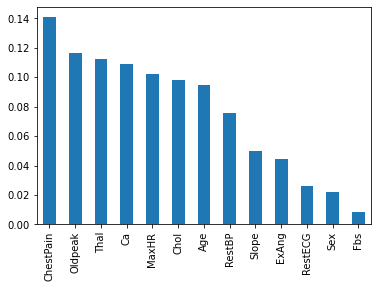

In [72]:
pd.Series(RFC.feature_importances_, index=X_train.columns).sort_values(ascending=False).plot.bar()